# River / Non river Assignment 5 

### Roll no: MIT2018007

1. Using Naive Bayesian classifier predict river non river using Satellite data set of Hooghly river (unstructured data set).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
import pathlib
import imageio
import numpy as np

In [6]:
pathlib

<module 'pathlib' from '/Users/ajay/anaconda3/lib/python3.6/pathlib.py'>

In [7]:
feature_paths = pathlib.Path('./images/').glob('*.gif')
label_path = pathlib.Path('./images/PDCV1.jpeg')
#feature_sorted = sorted([x for x in feature_paths]) 
#feature_sorted.append(label_path)

In [30]:
feature_sorted

[PosixPath('images/1.gif'),
 PosixPath('images/2.gif'),
 PosixPath('images/3.gif'),
 PosixPath('images/4.gif'),
 PosixPath('images/PDCV1.jpeg')]

In [8]:
#im = imageio.imread(str(training_sorted))
str(feature_paths), feature_sorted

('<generator object Path.glob at 0x1a0fc5ad00>',
 [PosixPath('images/1.gif'),
  PosixPath('images/2.gif'),
  PosixPath('images/3.gif'),
  PosixPath('images/4.gif'),
  PosixPath('images/PDCV1.jpeg')])

In [32]:
img = []
for i in range(5):
    im_path = feature_sorted[i]
    im = imageio.imread(str(im_path))
    print(im.shape)
    img.append(np.array(im.flatten()))

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)


In [35]:
np.random.seed(3)
data = pd.DataFrame(np.array(img).T,).sample(frac=1).reset_index(drop=True)
data = data.rename(index=str, columns={0:'Rband', 1:'Gband', 2:'Bband', 3:'Iband', 4:'Label'})
data.head()

,Rband,Gband,Bband,Iband,Label
0,40,26,26,40,0
1,40,25,26,42,0
2,37,23,19,46,0
3,42,27,28,39,0
4,41,25,24,37,0


In [59]:
data.tail()

,Rband,Gband,Bband,Iband,Label
262139,40,27,29,33,0
262140,37,23,22,35,0
262141,37,23,23,37,0
262142,44,29,30,21,255
262143,43,29,31,21,255


In [37]:
x = data.iloc[:,:4]
y = data.iloc[:,4] > 100

50 River class and 100 Non River Class

In [38]:
loc = np.append(np.where(y == True)[0][:50], np.where(y == False)[0][:100])
x_train = x.iloc[loc]
y_train = y.iloc[loc]

## Training

In [13]:
def train(x,y, alpha=1):
    vocab = {'Rband':[],'Gband':[],'Bband':[],'Iband':[]}
    freq_river = {'Rband':{},'Gband':{},'Bband':{},'Iband':{}}
    freq_nonriver = {'Rband':{},'Gband':{},'Bband':{},'Iband':{}}
    
    for i in ['Rband','Gband','Bband','Iband']:
        for j in range(150):
            if x[i][j] not in vocab[i]:
                vocab[i].append(x[i][j])
                freq_river[i][x[i][j]] = 0
                freq_nonriver[i][x[i][j]] = 0
            if y[j] == True:
                freq_river[i][x[i][j]] += 1
            else:
                freq_nonriver[i][x[i][j]] += 1
    freq = {'river':freq_river, 'nonriver': freq_nonriver}
    
    return freq, vocab

In [42]:
freq, vocab = train(x_train, y_train)
freq

{'river': {'Rband': {44: 27,
   45: 9,
   46: 5,
   43: 8,
   47: 1,
   40: 0,
   37: 0,
   42: 0,
   41: 0,
   39: 0,
   36: 0,
   38: 0,
   35: 0},
  'Gband': {30: 26,
   29: 10,
   32: 2,
   31: 11,
   28: 1,
   26: 0,
   25: 0,
   23: 0,
   27: 0,
   22: 0,
   24: 0,
   21: 0},
  'Bband': {32: 19,
   31: 20,
   30: 5,
   33: 3,
   29: 2,
   34: 1,
   26: 0,
   19: 0,
   28: 0,
   24: 0,
   23: 0,
   27: 0,
   20: 0,
   25: 0,
   35: 0,
   22: 0,
   21: 0,
   18: 0,
   37: 0},
  'Iband': {21: 20,
   23: 3,
   20: 8,
   26: 1,
   25: 3,
   22: 11,
   29: 1,
   24: 2,
   27: 1,
   40: 0,
   42: 0,
   46: 0,
   39: 0,
   37: 0,
   28: 0,
   32: 0,
   34: 0,
   36: 0,
   38: 0,
   30: 0,
   35: 0,
   44: 0,
   31: 0,
   33: 0,
   16: 0,
   47: 0,
   43: 0}},
 'nonriver': {'Rband': {44: 10,
   45: 3,
   46: 0,
   43: 11,
   47: 0,
   40: 14,
   37: 10,
   42: 13,
   41: 12,
   39: 18,
   36: 2,
   38: 5,
   35: 2},
  'Gband': {30: 2,
   29: 3,
   32: 0,
   31: 1,
   28: 11,
   26: 18,
  

# Bayes Rule for taking the decision

### If $P(River | w_1) > P(Non-River | w_1) $ <br> then <br>  $\;\;\;\;\;\;$ $River$ <br> else  <br> $\;\;\;\;\;\;$    $Non-river$
### $P(Non-river | w_1) = \frac{P(w_1 | Non-river) x P(non-river)}{P(w_1)} $ <br>
### $P(River | w_1) = \frac{P(w_1 | River) x P(River)}{P(w_1)} $

Here $P(w_1) $ in denominator is common for computing both probablities, so it is not required for the decision

In [41]:
def predict_river(x, freq, vocab):
    h = []
    for j in range(x.shape[0]):
        p_river = 1/3
        p_nonriver = 2/3
        for i in ['Rband','Gband','Bband','Iband']:
            if x[i][j] in vocab[i]:
                p_river *= freq['river'][i][x[i][j]] / 50
                p_nonriver *= freq['nonriver'][i][x[i][j]] / 100            
#             else:
#                 p_river *= 1 / 51
#                 p_nonriver *= 1 / 101
        if p_river > p_nonriver:
            h.append(1)
        else:
            h.append(0)
    return np.array(h)

In [17]:
def accuracy(h, y, freq, vocab) :
    cm = confusion_matrix(y,h)
    plot_cm(cm)
    print("\nTotal non River:" + str(np.where(y == 0)[0].shape[0]))
    print("Total River:" + str(np.where(y == 1)[0].shape[0]))
    
    print("\nPredicted non River:" + str(np.where(h == 0)[0].shape[0]))
    print("Predicted River:" + str(np.where(h == 1)[0].shape[0]))
    
    error = np.abs(h - y).sum()
    return (1 - error / data.shape[0] )* 100

### Ploting Function

Ref: https://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/

In [18]:
def plot_cm(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative (Not River)','Positive (River)']
    plt.title('River or Not River Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [19]:
freq, vocab = train(x_train, y_train)

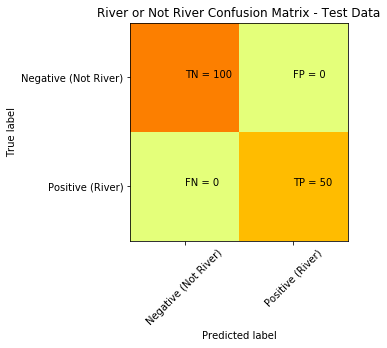


Total non River:100
Total River:50

Predicted non River:100
Predicted River:50


100.0

In [45]:
h = predict_river(x_train, freq, vocab)
accuracy(h, y_train, freq, vocab)

In [21]:
h = predict_river(x, freq, vocab)

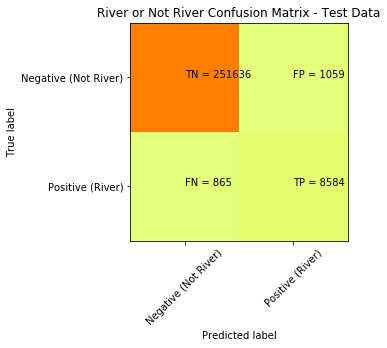


Total non River:252695
Total River:9449

Predicted non River:252501
Predicted River:9643


99.26605224609375

In [22]:
accuracy(h, y, freq, vocab)

In [23]:
x1 = pd.DataFrame(np.array(img).T,).iloc[:,:4]
x1 = x1.rename(index=str, columns={0:'Rband', 1:'Gband', 2:'Bband', 3:'Iband'})

In [53]:
x1.head()

,Rband,Gband,Bband,Iband
0,41,27,26,42
1,41,27,29,41
2,38,25,26,40
3,38,23,21,39
4,37,23,22,39


In [54]:
pred = predict_river(x1, freq, vocab)

In [56]:
pred[np.where(pred > 0)] = 255

In [57]:
pred = pred.reshape(512,-1)

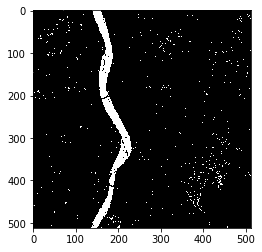

In [58]:
plt.imshow(pred, cmap='gray')